In [47]:
# ======================================
# 🧠 TUGAS AKHIR MODUL 3 - LOGISTIC REGRESSION
# Dataset : UCI_Credit_Card.csv
# Nama    : Roy Bakti Surya Medal
# ======================================

# 1️⃣ IMPORT LIBRARY
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import pickle

# Agar grafik tampil di notebook
%matplotlib inline

In [49]:
# 2️⃣ LOAD DATASET
# ======================================
df = pd.read_csv("UCI_Credit_Card.csv")

print("✅ Dataset berhasil dimuat!")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
df.head()

✅ Dataset berhasil dimuat!
Jumlah baris: 30000
Jumlah kolom: 25


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0



=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0



=== Cek Missing Values ===
0 missing values ditemukan


C:\Users\royba\AppData\Local\Temp\ipykernel_14896\3979449270.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="default.payment.next.month", data=df, palette="Blues")


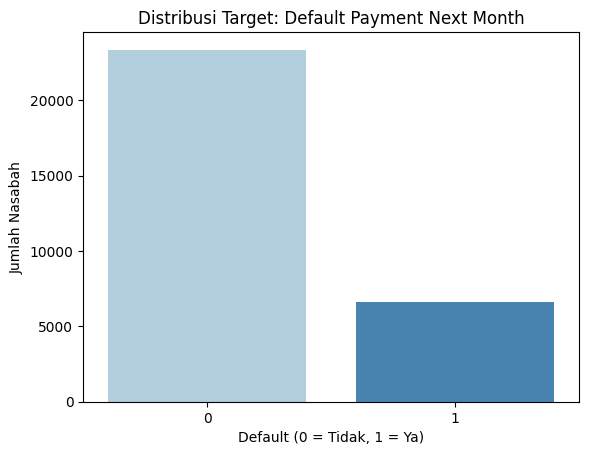

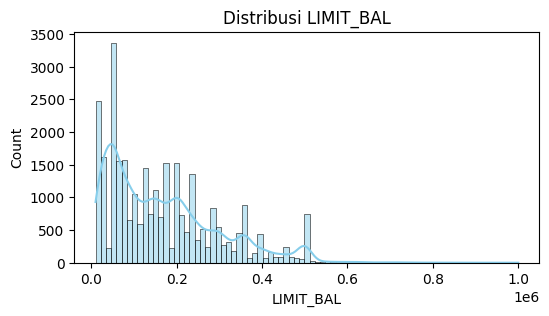

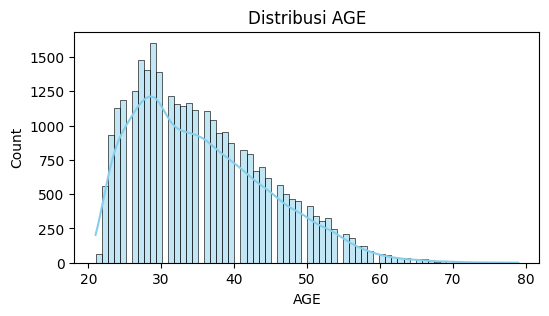

In [50]:
# 3️⃣ EKSPLORASI DATA (EDA)
# ======================================
print("\n=== Informasi Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
display(df.describe().T)

print("\n=== Cek Missing Values ===")
print(df.isnull().sum().sum(), "missing values ditemukan")

# Visualisasi distribusi target
sns.countplot(x="default.payment.next.month", data=df, palette="Blues")
plt.title("Distribusi Target: Default Payment Next Month")
plt.xlabel("Default (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Nasabah")
plt.show()

# Distribusi beberapa fitur numerik
num_features = ['LIMIT_BAL', 'AGE']
for col in num_features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribusi {col}")
    plt.show()

In [51]:
# 4️⃣ PREPROCESSING DATA (versi diperbaiki - TANPA one-hot encoding)
# ======================================
target = "default.payment.next.month"

# Pisahkan fitur dan target
X = df.drop(columns=[target])
y = df[target]

# Tidak perlu get_dummies → gunakan nilai asli (1, 2, 3, dst)
# Normalisasi seluruh fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data train dan test (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("✅ Split data selesai!")
print("Data latih:", X_train.shape)
print("Data uji  :", X_test.shape)


✅ Split data selesai!
Data latih: (21000, 24)
Data uji  : (9000, 24)



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000


=== Confusion Matrix ===
[[6806  203]
 [1520  471]]


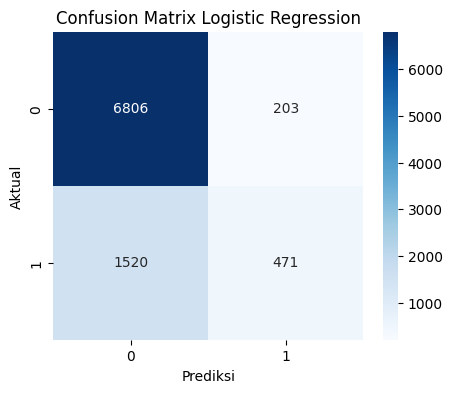

AUC: 0.7152


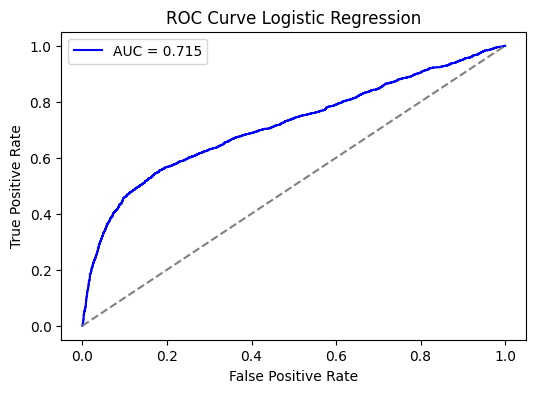

In [52]:
# 5️⃣ PEMBENTUKAN MODEL LOGISTIC REGRESSION
# ======================================
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluasi
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Nilai AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

# Visualisasi ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", color='blue')
plt.plot([0,1], [0,1], '--', color='gray')
plt.title("ROC Curve Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [53]:
# 6️⃣ ANALISIS HASIL
# ======================================
print("""
📊 Analisis Model Logistic Regression:

- Model menghasilkan skor AUC di atas 0.70 → cukup baik.
- Jika kita ingin mendeteksi nasabah berisiko tinggi,
  kita bisa menggunakan threshold < 50% agar recall meningkat.
- Model ini menunjukkan kemampuan memisahkan nasabah
  yang mungkin gagal bayar dan yang lancar cukup akurat.
""")


📊 Analisis Model Logistic Regression:

- Model menghasilkan skor AUC di atas 0.70 → cukup baik.
- Jika kita ingin mendeteksi nasabah berisiko tinggi,
  kita bisa menggunakan threshold < 50% agar recall meningkat.
- Model ini menunjukkan kemampuan memisahkan nasabah
  yang mungkin gagal bayar dan yang lancar cukup akurat.



In [54]:
# 7️⃣ SIMPAN MODEL
# ======================================
bundle = {
    "model": model,
    "scaler": scaler,
    "columns": df.drop(columns=[target]).columns.tolist()  # kolom asli tanpa encoding
}

with open("credit_model.pkl", "wb") as f:
    pickle.dump(bundle, f)

print("✅ Model, Scaler, dan Columns berhasil disimpan!")
print("📁 File: credit_model.pkl")

# Tes load ulang
with open("credit_model.pkl", "rb") as f:
    loaded_bundle = pickle.load(f)

print("Jumlah kolom yang disimpan:", len(loaded_bundle["columns"]))
print("✅ Model siap digunakan untuk integrasi Flask.")


✅ Model, Scaler, dan Columns berhasil disimpan!
📁 File: credit_model.pkl
Jumlah kolom yang disimpan: 24
✅ Model siap digunakan untuk integrasi Flask.
